In [2]:
# import packages
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
import pandas_profiling
%matplotlib inline


In [3]:
# Read in Data Frame and inspect it
df = pd.read_csv('CSV_MASTERS/population.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Chondrite,L,Germany,DE,233.0,90.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Chondrite,H,Denmark,DK,133.0,52.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Chondrite,E,Canada,CA,4.0,1.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Achondrite,Acapulcoite,Mexico,MX,64.0,25.0
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Chondrite,L,Argentina,AR,16.0,6.0


In [5]:
# Make a coordinates column that has a value of a list of longitude and latitude
df['coordinates'] = df[['reclong', 'reclat']].values.tolist()
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Chondrite,L,Germany,DE,233.0,90.0,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Chondrite,H,Denmark,DK,133.0,52.0,"[10.23333, 56.18333000000001]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Chondrite,E,Canada,CA,4.0,1.0,"[-113.0, 54.21666999999999]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Achondrite,Acapulcoite,Mexico,MX,64.0,25.0,"[-99.9, 16.883329999999994]"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Chondrite,L,Argentina,AR,16.0,6.0,"[-64.95, -33.16667]"


In [7]:
# Make the coordinate column a Point object
df['coordinates'] = df['coordinates'].apply(Point)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Chondrite,L,Germany,DE,233.0,90.0,POINT (6.08333 50.775)
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Chondrite,H,Denmark,DK,133.0,52.0,POINT (10.23333 56.18333000000001)
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Chondrite,E,Canada,CA,4.0,1.0,POINT (-113 54.21666999999999)
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Achondrite,Acapulcoite,Mexico,MX,64.0,25.0,POINT (-99.90000000000001 16.88332999999999)
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Chondrite,L,Argentina,AR,16.0,6.0,POINT (-64.95 -33.16667)


In [8]:
# Export this data frame to the CSV
df.to_csv('CSV_MASTERS/Final.csv', index = False)

In [ ]:
geo_final = gpd.GeoDataFrame(df, geometry='coordinates', crs={'init': 'epsg:4326'})
print(type(geo_final))
geo_final.head()

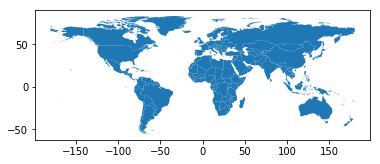

In [4]:
earth = gpd.read_file("custom.geo.json")
earth.plot()

In [ ]:
# Plotting to see one meteor landing location:
# make earth the base figure
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#0B2380',)

# plotting the ISS position over the eart with navy
geo_ISS.plot(ax=base, marker="*", markersize=10, cmap = 'jet');
fig.savefig('ISS path')